In [30]:
!pip install quandl
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import json


import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from scipy import stats

from bs4 import BeautifulSoup
import os
import codecs

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import warnings;
warnings.simplefilter('ignore')
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

In [3]:
# Federal Debt: Total Public Debt as Percent of Gross Domestic Product, Quarterly
# Units: Percent of GDP, Seasonally Adjusted
# Source: FRED (Federal Reserve Bank St. Louis)

debt = quandl.get("FRED/GFDEGDQ188S", authtoken="ckJvd5G2a2dkK9nun3xS")

In [4]:
debt.columns

Index(['Value'], dtype='object')

In [5]:
debt['lag'] = debt['Value'].shift(1)
debt.head()

,Value,lag
Date,,
1966-01-01,40.33999,NaN
1966-04-01,39.26763,40.33999
1966-07-01,39.62091,39.26763
1966-10-01,39.51977,39.62091
1967-01-01,39.20383,39.51977


In [6]:
# Get the date in a new column to be able to merge tables on Date
debt['Date'] = debt.index

debt['lag'] = debt.Value.shift(1)

In [7]:
# As there is no lagged Debt for the first date we delete the first row 

to_drop = debt.iloc[:1]
debt.drop(to_drop.index, axis=0, inplace=True)

In [8]:
# The  monthly Debt returns is simply the rate of change between months ((t - t-1)/t-1)*100

debt['diff'] = (debt['Value']-debt['lag'])

In [9]:
debt.head()

,Value,lag,Date,diff
Date,,,,
1966-04-01,39.26763,40.33999,1966-04-01,-1.07236
1966-07-01,39.62091,39.26763,1966-07-01,0.35328
1966-10-01,39.51977,39.62091,1966-10-01,-0.10114
1967-01-01,39.20383,39.51977,1967-01-01,-0.31594
1967-04-01,38.03292,39.20383,1967-04-01,-1.17091


In [10]:
date = ['Date']
presidents1 = pd.read_csv('clean_sp.csv', parse_dates=date)
presidents1.head()

,Unnamed: 0,Date,monthly_return_per,president
0,0,1871-02-28,1.351351,Ulysses S. Grant
1,1,1871-03-31,2.444444,Ulysses S. Grant
2,2,1871-04-30,2.819957,Ulysses S. Grant
3,3,1871-05-31,2.531646,Ulysses S. Grant
4,4,1871-06-30,-0.823045,Ulysses S. Grant


In [ ]:
# presidents1['Date'] = presidents1.index

In [11]:
presidents1['Date'][4]

Timestamp('1871-06-30 00:00:00')

In [12]:
presidents1['month'] = presidents1['Date'].dt.month
presidents1['year'] = presidents1['Date'].dt.year
presidents1['monthyear'] = presidents1['year'].map(str) + '/' + presidents1['month'].map(str)

In [13]:
type(debt.Date)

pandas.core.series.Series

In [14]:
debt['Date'] = debt.index

In [15]:
debt['month'] = debt['Date'].dt.month
debt['year'] = debt['Date'].dt.year
debt['monthyear'] = debt['year'].map(str) + '/' + debt['month'].map(str)

In [17]:
debt.head()

,Value,lag,Date,diff,month,year,monthyear
Date,,,,,,,
1966-04-01,39.26763,40.33999,1966-04-01,-1.07236,4,1966,1966/4
1966-07-01,39.62091,39.26763,1966-07-01,0.35328,7,1966,1966/7
1966-10-01,39.51977,39.62091,1966-10-01,-0.10114,10,1966,1966/10
1967-01-01,39.20383,39.51977,1967-01-01,-0.31594,1,1967,1967/1
1967-04-01,38.03292,39.20383,1967-04-01,-1.17091,4,1967,1967/4


In [19]:
df_debt = debt.merge(presidents1, on= 'monthyear' , how='left')
debt_p = df_debt[['Date_x', 'Value', 'diff','president']]
debt_p['president'] = debt_p['president'].fillna(method = 'backfill')
debt_p['president'].fillna('Donald Trump' , inplace= True)

In [20]:
debt_p.head()

,Date_x,Value,diff,president
0,1966-04-01,39.26763,-1.07236,Lyndon B. Johnson
1,1966-07-01,39.62091,0.35328,Lyndon B. Johnson
2,1966-10-01,39.51977,-0.10114,Lyndon B. Johnson
3,1967-01-01,39.20383,-0.31594,Lyndon B. Johnson
4,1967-04-01,38.03292,-1.17091,Lyndon B. Johnson


# creating new columns for Trump
   where 0 = all other presidents and 1 = Trump


In [21]:
debt_p['Trump'] = 0

In [22]:
debt_p[debt_p.president == 'Donald Trump'] = debt_p[debt_p.president == 'Donald Trump'].assign(Trump = 1)

In [23]:
group1 = debt_p[debt_p.Trump == 1]
group2 = debt_p[debt_p.Trump == 0] # note group2 is all other presidents

In [24]:
debt_p.head()

,Date_x,Value,diff,president,Trump
0,1966-04-01,39.26763,-1.07236,Lyndon B. Johnson,0
1,1966-07-01,39.62091,0.35328,Lyndon B. Johnson,0
2,1966-10-01,39.51977,-0.10114,Lyndon B. Johnson,0
3,1967-01-01,39.20383,-0.31594,Lyndon B. Johnson,0
4,1967-04-01,38.03292,-1.17091,Lyndon B. Johnson,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1765d2e8>,
      dtype=object)

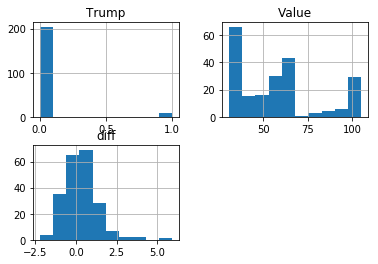

In [25]:
debt_p.hist()

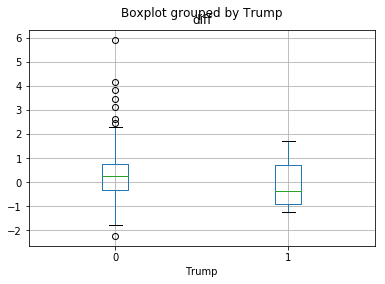

In [26]:
plt.figure
debt_p.boxplot(column=['diff'], by = 'Trump')

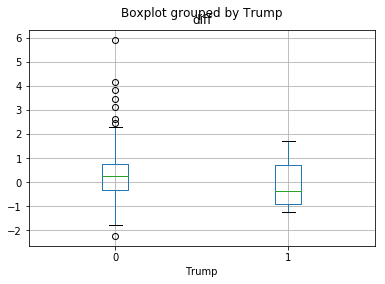

In [27]:
debt_p.boxplot(column=['diff'], by = 'Trump')

In [28]:
ttest_ind(group1['diff'], group2['diff'] , alternative = 'two-sided', value=0)

(-0.9357147625199149, 0.35048975101582514, 211.0)

# Welch T-Test

In [31]:
stats.ttest_ind(group1['diff'], group2['diff'], equal_var= False)

Ttest_indResult(statistic=-0.8699680785639797, pvalue=0.40790768309325953)

In [ ]:
#note = ttest = -0.936
#p-value = .35% thus there is a 35% chance that this is pure luck

In [32]:
debt_p.describe()

,Value,diff,Trump
count,213.000000,213.000000,213.000000
mean,57.458717,0.295120,0.042254
std,23.450910,1.045774,0.201641
min,30.603330,-2.232300,0.000000
25%,35.632370,-0.323650,0.000000
50%,56.036130,0.250300,0.000000
75%,64.307090,0.768900,0.000000
max,105.186130,5.916010,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c18087ac8>,
      dtype=object)

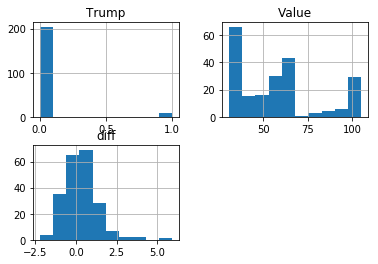

In [34]:
debt_p.hist()

In [ ]:
# note that there is a median percentile is 50%

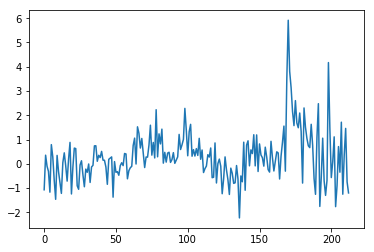

In [36]:
debt_p['diff'].plot()

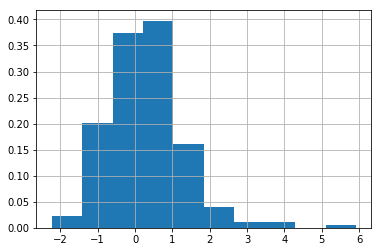

In [37]:
debt_p['diff'].hist(density=True)

In [38]:
debt_p.describe()

,Value,diff,Trump
count,213.000000,213.000000,213.000000
mean,57.458717,0.295120,0.042254
std,23.450910,1.045774,0.201641
min,30.603330,-2.232300,0.000000
25%,35.632370,-0.323650,0.000000
50%,56.036130,0.250300,0.000000
75%,64.307090,0.768900,0.000000
max,105.186130,5.916010,1.000000


In [43]:
#checking above median Value and below median Value
low_test = debt_p['diff'] < 0.042
high_test = debt_p['diff'] >=0.042

#Normal Test

In [ ]:
ttest_ind(high_test['diff'], low_test['diff'], alternative='two-sided', value=0)

In [45]:
debt_p.head()

,Date_x,Value,diff,president,Trump
0,1966-04-01,39.26763,-1.07236,Lyndon B. Johnson,0
1,1966-07-01,39.62091,0.35328,Lyndon B. Johnson,0
2,1966-10-01,39.51977,-0.10114,Lyndon B. Johnson,0
3,1967-01-01,39.20383,-0.31594,Lyndon B. Johnson,0
4,1967-04-01,38.03292,-1.17091,Lyndon B. Johnson,0


In [46]:
DT =debt_p.loc[debt_p['president'] == 'Donald Trump']

# Mean & STD OF Donald Trump's Debt

In [47]:
DT['diff'].mean()

-0.024190000000001217

In [48]:
DT['diff'].std()

1.1286357415481783

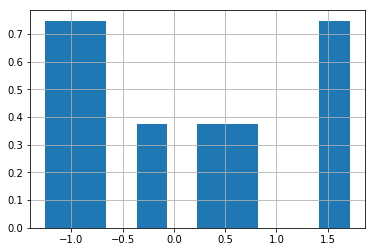

In [49]:
DT['diff'].hist(density= True)

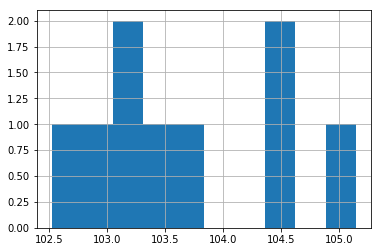

In [50]:
DT['Value'].hist()

In [51]:
OtherPresidents = debt_p.loc[debt_p['president'] != 'Donald Trump']

# Boxplot of Difference And Value of Only Donald Trump

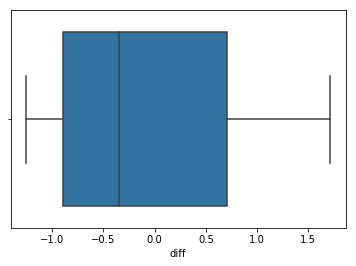

In [52]:
sns.boxplot(DT['diff'])

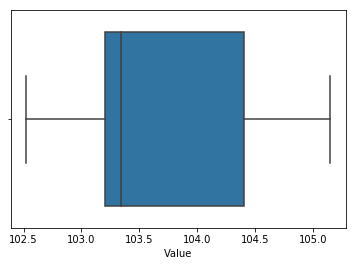

In [53]:
sns.boxplot(DT['Value'])

# Boxplot for Difference of All other presidents

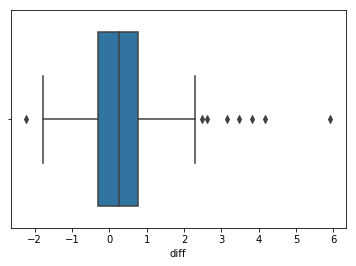

In [54]:
sns.boxplot(OtherPresidents['diff'])